Wykresy:

1) Dystrybucja - violin, boxplot, densityplot, histogram

2) Rozkłąd kilku zmiennych - scatter, bubble-scatter, heatmap, correlogram, densityplot

3) Rankingi - barplot, lolipop plot, spider, parallellines, circular barplot

4) Część całości - stacked barplot, donut plot, pie chart, treemap, dendrogram, venn diagram, sunburst

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
import matplotlib.patches as patch
import seaborn as sns
import numpy as np
import math
import re
from matplotlib.patches import Patch
import bokeh
from matplotlib_venn import venn3
import squarify

In [39]:
#usuwam wiodącą spację z datasetu - śmieć, który się ostał po webscrappingu; zmieniam błędną nazwę ostatniej kolumny
df=pd.read_csv('https://raw.githubusercontent.com/JonothorDarry/Wizualizacje_Python/master/H3Units.csv')
df.replace(to_replace =' ', value='', regex=True, inplace=True)
print(df.at[2,'Unit_name'])
df['Special_abilities']=df['Special Ablility']
del df['Special Ablility']
df.loc[df['Special_abilities'].isna(),'Special_abilities']='-'

df['Type']='Warrior'
#Devil i archdevil mają własność 'Teleporting' - de facto tożsama z flying
k=df['Special_abilities'].str.contains('Flying|Teleporting')
l=df['Special_abilities'].str.contains('Ranged')
df.loc[k,'Type']='Flying'
df.loc[l,'Type']='Ranged'

Archer
            Unit_name    Castle Level  Attack  Defence  Minimum Damage  \
0             Pikeman    Castle     1       4        5               1   
1          Halberdier    Castle    1+       6        5               2   
2              Archer    Castle     2       6        3               2   
3            Marksman    Castle    2+       6        3               2   
4             Griffin    Castle     3       8        8               3   
5        RoyalGriffin    Castle    3+       9        9               3   
6           Swordsman    Castle     4      10       12               6   
7            Crusader    Castle    4+      12       12               7   
8                Monk    Castle     5      12        7              10   
9              Zealot    Castle    5+      12       10              10   
10           Cavalier    Castle     6      15       15              15   
11           Champion    Castle    6+      16       16              20   
12              Angel    Castle

In [3]:
k=df['Unit_name'].str.contains('Dragon$')
df[k]

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Additional_item,Special_abilities
26,GreenDragon,Rampart,7,18,18,40,50,180,10,1,4872,2400,"Crystal,1","Flying,Breathattack,Resistlvl1–3spells"
27,GoldDragon,Rampart,7+,27,27,40,50,250,16,1,8613,4000,"Crystal,2","Flying,Breathattack,Resistlvl1–4spells"
68,BoneDragon,Necropolis,7,17,15,25,50,150,9,1,3388,1800,0,"Dragon,Undead,Flying,Morale-1"
69,GhostDragon,Necropolis,7+,19,17,25,50,200,14,1,4696,3000,"Mercury,1","Dragon,Undead,Flying,Morale-1,Aging"
82,RedDragon,Dungeon,7,19,19,40,50,180,11,1,4702,2500,"Sulfur,1","Dragon,Flying,Breathattack,Resistlvl1-3spells"
83,BlackDragon,Dungeon,7+,25,25,40,50,300,15,1,8721,4000,"Sulfur,2","Dragon,Flying,Breathattack,Resistallspells,Hat..."
137,FaerieDragon,Neutral,7,20,20,20,30,500,15,1,19580,10000,"Gem,8","Dragon,Flying,Spellcaster,MagicMirror"
138,RustDragon,Neutral,7,30,30,50,50,750,17,1,26433,15000,"Sulfur,14","Dragon,Flying,Breath,Acidbreath"
139,CrystalDragon,Neutral,7,40,40,60,75,800,16,1,39338,20000,"Crystal,10","Dragon,Crystalgeneration,Resistance+20%,Unliving"
140,AzureDragon,Neutral,7,50,50,70,80,1000,19,1,78845,30000,"Mercury,20","Dragon,Flying,Breath,Fear,Resistlvl1–3spells,R..."


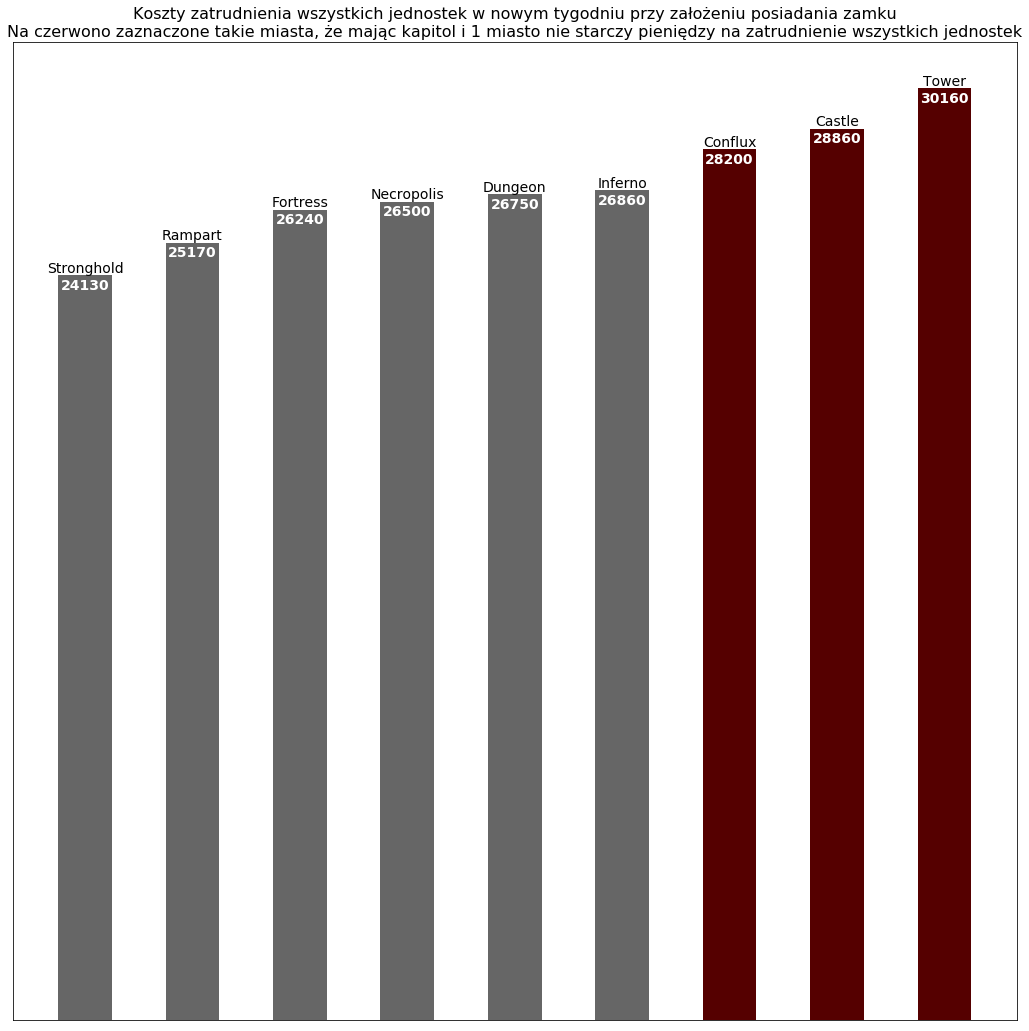

In [4]:
#ranking #1 - Barplot - zsumowane koszty zatrudnienia wszystkich jednostek w nowym tygodniu - założenie posiadania Zamku
df2=df.copy()
df2['All']=df2['Growth']*df2['Gold']*2
k=df2['Level'].str.contains('\+')
df2=df2[k]
df2=df2.groupby(['Castle'], as_index=False).sum().sort_values(by='All')

fig, ax=plt.subplots(1,1)
fig.set_size_inches(18,18)

cncs=df2.columns.get_loc('Castle')
cnal=df2.columns.get_loc('All')
for i in range(0, df2.shape[0], 1):
    Z=df2.iat[i, cnal]
    if (Z<28000):
        ax.bar(x=i, height=Z, color='#666666', width=0.5)
    else:
        ax.bar(x=i, height=Z, color='#550000', width=0.5)
    ax.text(x=i, y=Z-100, s=str(Z), horizontalalignment='center', verticalalignment='top', fontsize=14, color='white', weight='bold')
    ax.text(x=i, y=Z, s=df2.iat[i, cncs], horizontalalignment='center', verticalalignment='bottom', fontsize=14)

#ax.axis('off')
ax.get_yaxis().set_visible(False)
ax.set_xticks([])
ax.set_title('Koszty zatrudnienia wszystkich jednostek w nowym tygodniu przy założeniu posiadania zamku\nNa czerwono zaznaczone takie miasta, że mając kapitol i 1 miasto nie starczy pieniędzy na zatrudnienie wszystkich jednostek', fontsize=16)

plt.show()

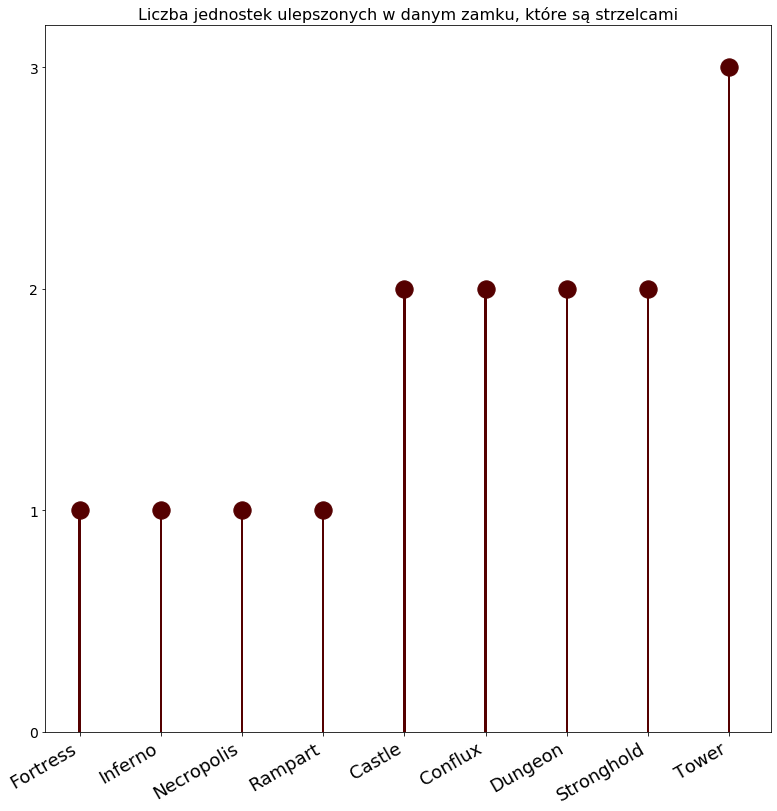

In [5]:
#ranking #2 - lolipop plot - barchart wąski z oznaczonym kropką końcem


df2=df.copy()
k=df2['Special_abilities'].str.contains('Ranged\(')
l=df2['Level'].str.contains('\+')

df2=df2[k&l]
df2['All']=1
df2=df2.groupby(['Castle'], as_index=False).sum().sort_values(by='All')


fig, ax=plt.subplots(1,1)
fig.set_size_inches(13,13)

f=df2.columns.get_loc('All')
for i in range(df2.shape[0]):
    Z=df2.iat[i,f]
    ax.bar(x=i, height=Z, width=0.03, color='#550000')
    ax.scatter(x=i, y=Z, color='#550000', s=300.1)

ax.set_xticks(range(0,9,1))
ax.set_yticks(range(0,4,1))
ax.set_xticklabels(df2['Castle'], ha='right')
ax.xaxis.set_tick_params(labelsize=18, labelrotation=30)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('Liczba jednostek ulepszonych w danym zamku, które są strzelcami', fontsize=16)
#plt.grid(axis='y')

plt.show()

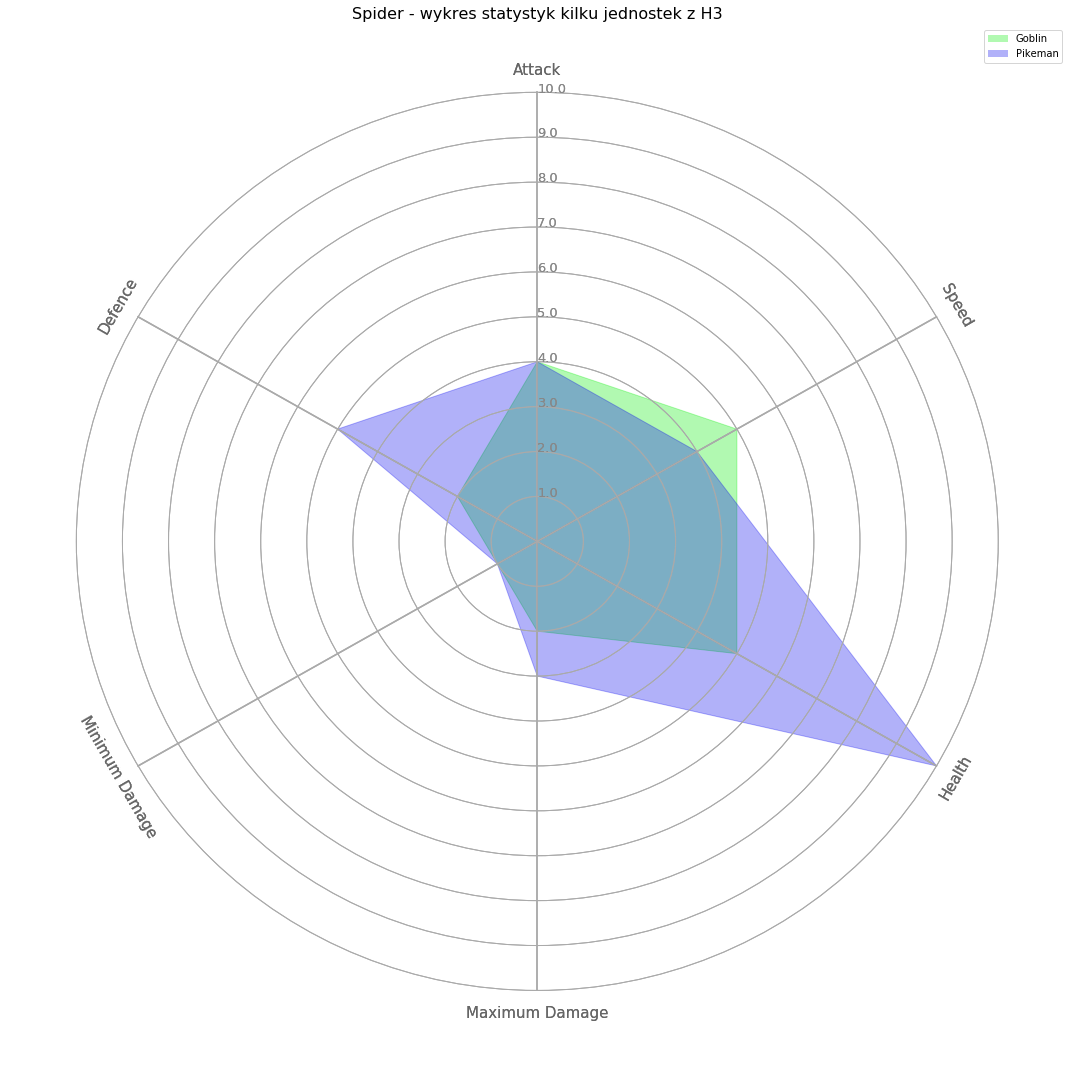

In [6]:
#ranking #3 - Spider

#allez-promień koła, n-liczba promieni radara, m-licba kółek, maxi-najwyższa liczba na radarze, subd-ciąg z labelami, ax-wykres, incol-kolor żłoba, legg-legenda, lab-label
def spiderland(allez, n, m, maxi, subd, ax, incol='#EE0000', legg=[], lab='Nan'):
    #Dodanie do legendy nowego obiektu
    legg.append(Patch(facecolor=incol, alpha=0.3, label=lab))
    
    deg=2*math.pi/n
    x=[0]*n
    y=[allez]*n

    #punkty końca linii radaru
    for i in range(1, n, 1):
        x[i]=x[i-1]*math.cos(deg)-y[i-1]*math.sin(deg)
        y[i]=x[i-1]*math.sin(deg)+y[i-1]*math.cos(deg)

    #Radar
    for i in range(n):
        ax.plot([0, x[i]], [0, y[i]], color='#AAAAAA')

    #Wypełnienie trójkątów
    i=1
    while (i<n):
        ax.fill([0, x[i-1]*int(subd[i-1])/maxi, x[i]*int(subd[i])/maxi], [0, y[i-1]*int(subd[i-1])/maxi, y[i]*int(subd[i])/maxi], alpha=0.3, color=incol)
        i+=1
    ax.fill([0, x[i-1]*int(subd[i-1])/maxi, x[0]*int(subd[0])/maxi], [0, y[i-1]*int(subd[i-1])/maxi, y[0]*int(subd[0])/maxi], alpha=0.3, color=incol)

    #Tekst labeli na kresie spidera
    for i in range(n):
        roth=i*deg*(180/math.pi)
        if (roth>90 and roth<270):
            roth=180+roth
        ax.text(x=x[i]*1.05, y=y[i]*1.05, s=subd.index[i], fontsize=15, color='#666666', rotation=roth, horizontalalignment='center', verticalalignment='center')


    #Kręgi
    crc=[0]*m
    for i in range(m):
        crc[i]=plt.Circle((0,0), allez*(i+1)/m, color='#AAAAAA', fill=None)
        ax.add_artist(crc[i])
        ax.text(x=0, y=allez*(i+1)/m, s=str(maxi*(i+1)/m), fontsize=13, color='#888888')

    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-2.3, 2.3)

fig, ax=plt.subplots(1,1)
fig.set_size_inches(19, 19)

leggy=[]
spiderland(2, 6, 10, 10, df[df['Unit_name']=='Goblin'].iloc[0,3:9], ax, incol='#00EE00', legg=leggy, lab='Goblin')
spiderland(2, 6, 10, 10, df[df['Unit_name']=='Pikeman'].iloc[0,3:9], ax, incol='#0000EE', legg=leggy, lab='Pikeman')
ax.legend(handles=leggy)
ax.set_title('Spider - wykres statystyk kilku jednostek z H3', fontsize=16)
ax.axis('off')

plt.show()

#print(df[df['Unit_name']=='Gnoll'].iloc[0,:][2:7])

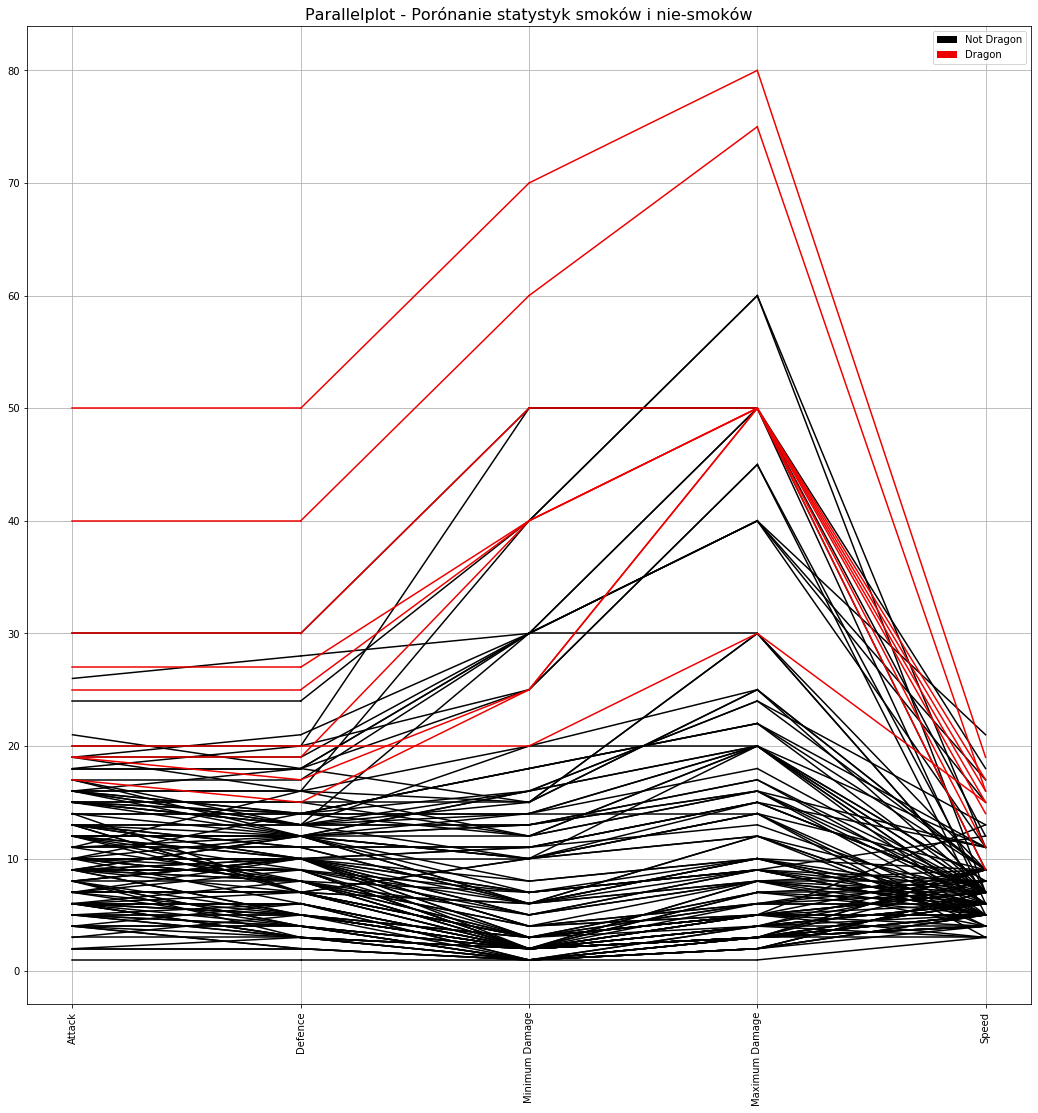

In [7]:
#ranking #4 - parallelplots - lepszy od spidera, bo zamiast współrzędnych polarnych są kartezyańskie
#Pozwala pokazywać dane w dowolnie wysokim wymiarze (podobnie jak spider)
def drawparallels(ax, subd, legg=[], lab='', incol='#EE0000'):
    for j in range(1, subd.shape[0], 1):
        for i in range(1, subd.shape[1], 1):
            ax.plot([i-1, i], [subd.iloc[j,i-1], subd.iloc[j,i]], color=incol)
    
    legg.append(Patch(facecolor=incol, label=lab)) 
    ax.set_xticks(range(0, subd.shape[1], 1))
    ax.set_xticklabels(subd.columns)
    ax.xaxis.set_tick_params(labelrotation=90)


fig, ax=plt.subplots(1,1)
fig.set_size_inches(18,18)
colors=['#EE0000', '#888800', '#990044', '#EE0088', '#0000EE', '#00EE88', '#000000']
lg=[]

#komentarz - parallelplot z poziomami
#for i in range(1, 8, 1):
#    mdf=df[(df['Level']==str(i)) | (df['Level']==str(i)+'+')].iloc[:,[3,4,5,6,8]]
#    drawparallels(ax, mdf, legg=lg, lab=str(i), incol=colors[i-1])

#print(df[(df['Level']==str(i)) | (df['Level']==str(i)+'+')])


k=df['Unit_name'].str.contains('Dragon$')
k[k.isna()]=False
k=k.astype('bool')

mdf=df[np.invert(k)].iloc[:,[3,4,5,6,8]]
drawparallels(ax, mdf, legg=lg, lab='Not Dragon', incol=colors[6])
mdf=df[k].iloc[:,[3,4,5,6,8]]
drawparallels(ax, mdf, legg=lg, lab='Dragon', incol=colors[0])

ax.legend(handles=lg)
ax.set_title('Parallelplot - Porónanie statystyk smoków i nie-smoków', fontsize=16)
ax.grid()
plt.show()

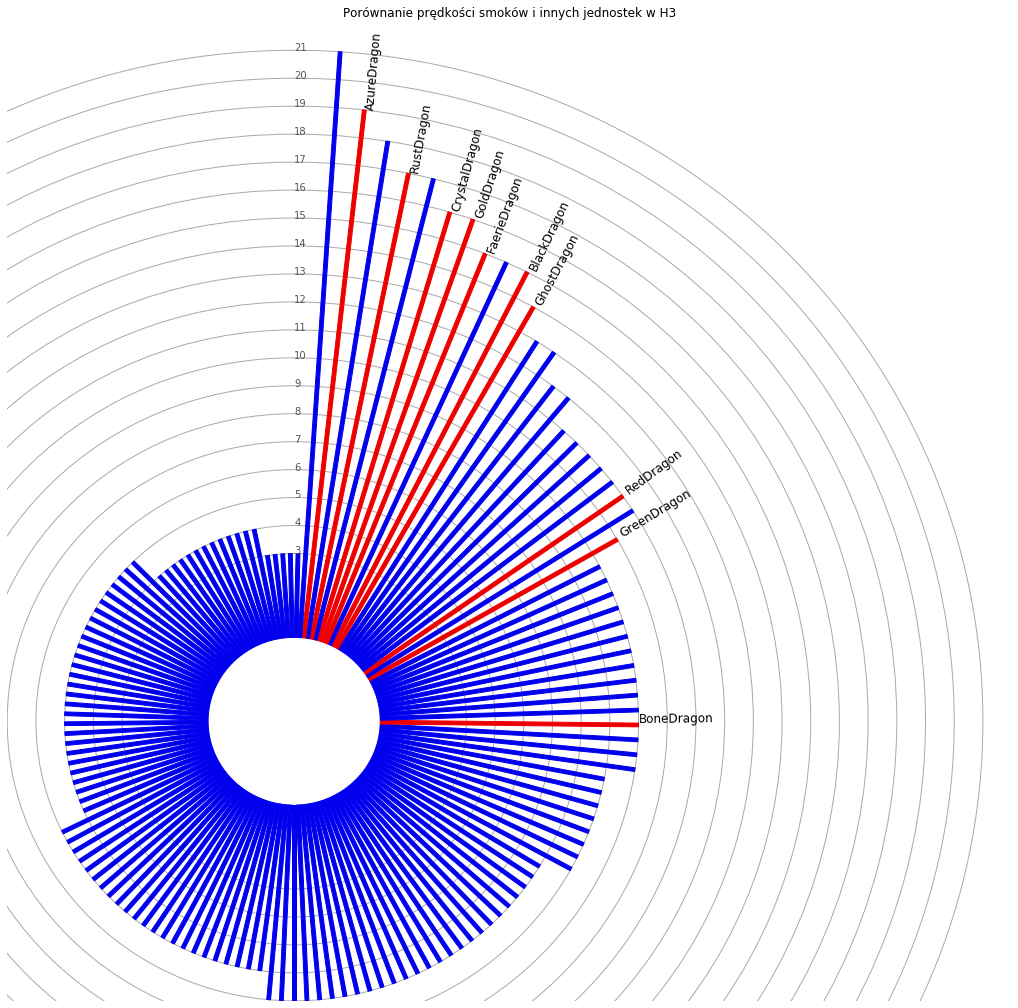

In [8]:
#Ranking #5 - kołowy barplot - dosyć ekstrawagancji, problemy analogiczne jak ze spiderplotem
#Wykres przedstawia zestawienie szybkości jednostek w H3 z wyróżnieniem smoków

fig, ax=plt.subplots(1,1)
fig.set_size_inches(18,18)

def dist(x1, x2, y1, y2):
    return (math.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2)))

def circlebar(ax, heights, colors='#EE0000', labels=''):
    if (type(colors)==type('star')):
        colors=[colors]*len(heights)
    if (type(labels)==type('star')):
        labels=[labels]*len(heights)
    N=len(heights)
    Rad=3
    
    x=[0]*N
    y=[Rad]*N
    deg=2*math.pi/N
    degn=360/N
    
    #Ręcznie napisany radar - może kiedyś domknę go w argumencie funkcji
    for i in range(6, 25, 1):
        f=plt.Circle((0,0), i, fill=None, color='#AAAAAA')
        ax.add_artist(f)
        ax.text(x=0, y=i, s=str(i-Rad), color='#555555')
    
    for i in range(1, N, 1):
        x[i]=math.cos(deg)*x[i-1]-math.sin(deg)*y[i-1]
        y[i]=math.sin(deg)*x[i-1]+math.cos(deg)*y[i-1]
        f=plt.Rectangle(xy=(x[i],y[i]), width=dist(x[i-1],x[i],y[i-1],y[i]), height=heights[i],
                        angle=(2*i-1)*degn/2, color=colors[i])
        ax.add_artist(f)
        #ax.text(x=(x[i])*(2+heights[i])/2, y=(y[i])*(2+heights[i])/2, s=labels[i], fontsize=12, rotation=i*degn+90, verticalalignment='bottom', horizontalalignment='left')
        ax.text(x=(x[i]+x[i-1])*(Rad+heights[i])/(2*Rad), y=(y[i]+y[i-1])*(Rad+heights[i])/(2*Rad), s=labels[i], fontsize=12, rotation=i*degn+90, verticalalignment='bottom', horizontalalignment='left')
        
    f=plt.Rectangle(xy=(x[0],y[0]), width=dist(x[N-1],x[0],y[N-1],y[0]), height=heights[0],
                    angle=(-1)*degn/2, color=colors[0])
    ax.add_artist(f)
    ax.text(x=x[i]*(2+heights[0])/2, y=y[i]*(2+heights[0])/2, s=labels[0], fontsize=12, rotation=0*degn+90)
    
    return


df2=df.copy()
df2.sort_values(by='Speed', inplace=True)

df2.index=range(0,df2.shape[0],1)
k=df2['Unit_name'].str.contains('Dragon$')

df2['Coll']='#0000EE'
df2.loc[k,'Coll']='#EE0000'
df2['Lab']=''
df2.loc[k,'Lab']=df2.loc[k,'Unit_name']

circlebar(ax, heights=df2['Speed'], colors=df2['Coll'], labels=df2['Lab'])

ax.set_title('Porównanie prędkości smoków i innych jednostek w H3')
ax.set_xlim(-10,25)
ax.set_ylim(-10,25)
ax.axis('off')

plt.show()

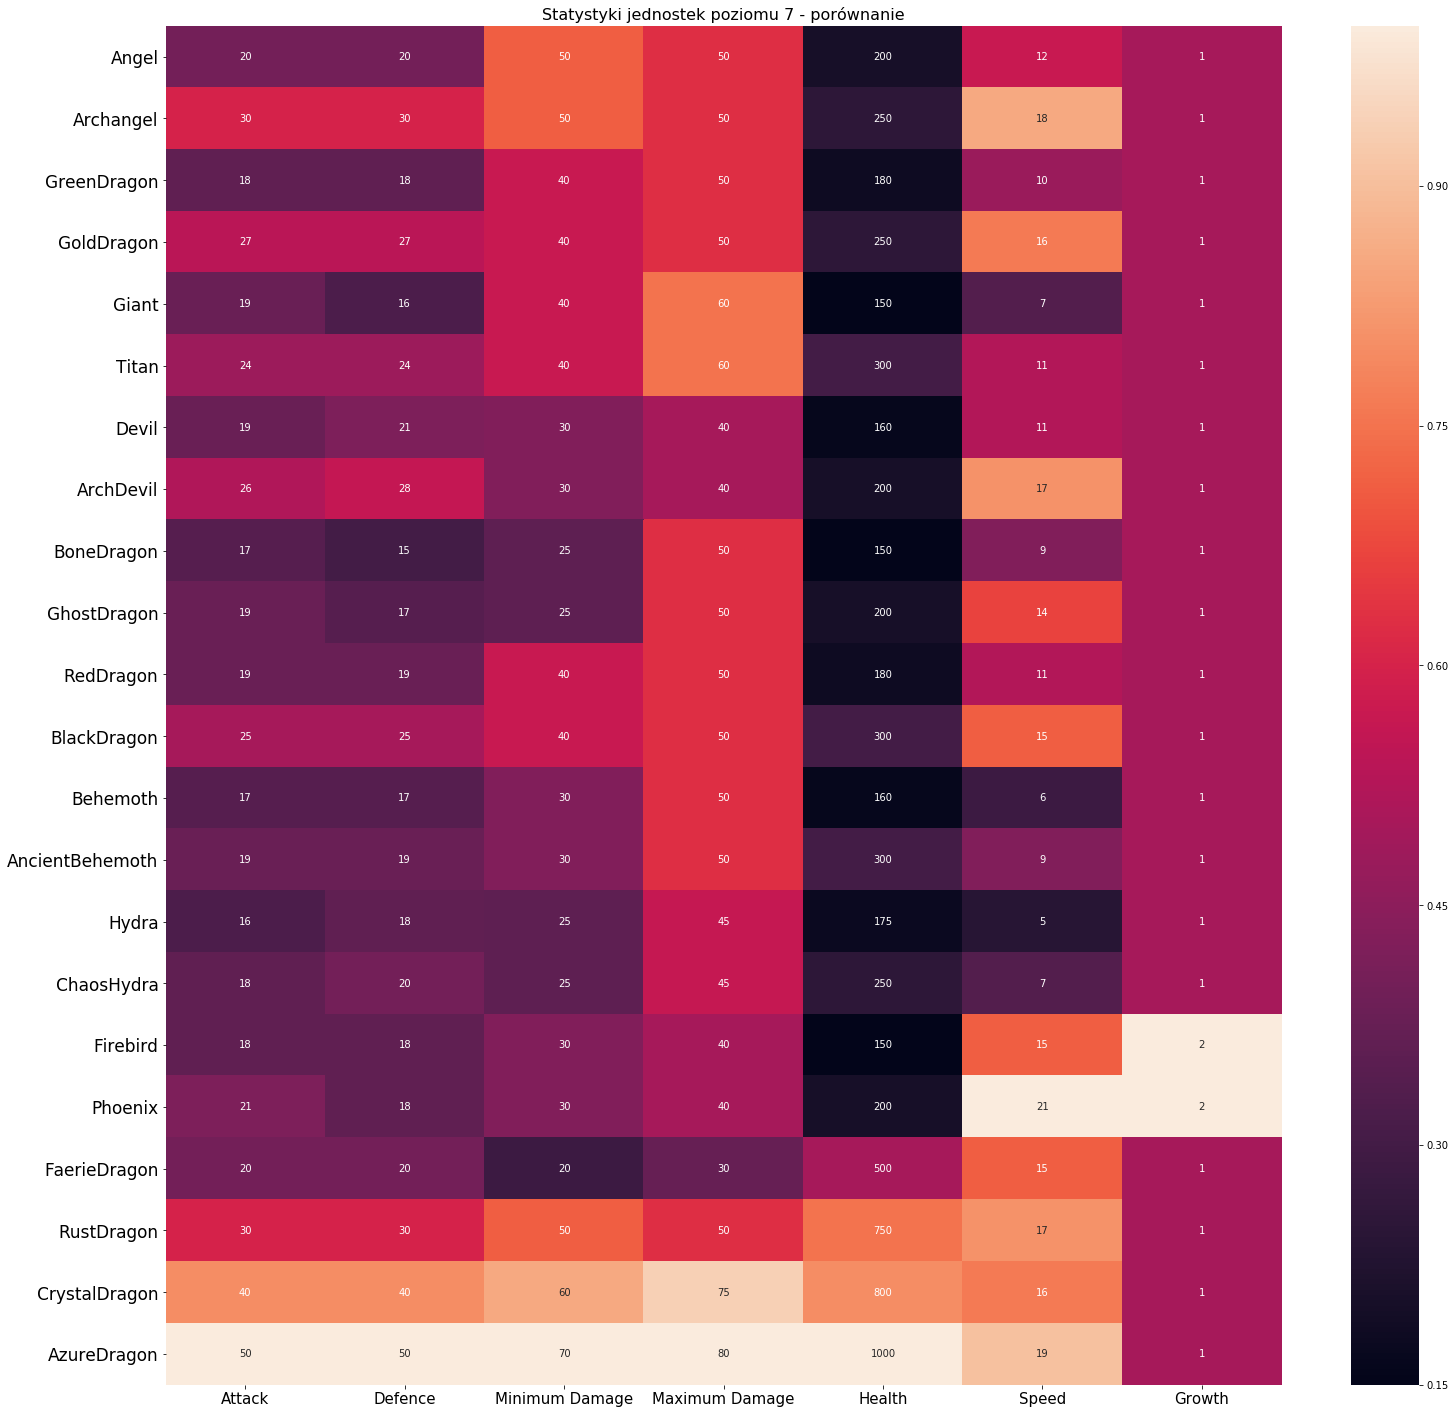

In [9]:
#Korelacja #3 - heatmap z normalizacją (proporcje z przedziału 0-1)
#legenda pokazuje proporcje (Im jaśniej, tym większa wartość w kolumnie)
def besserheatmap(df, ax, labels=2.312, ant=False):
    for i in range(0, df.shape[1], 1):
        mn=df.iloc[:,i].max()
        df.iloc[:,i]=df.iloc[:,i]/mn
    
    sns.heatmap(data=df, ax=ax, annot=ant, fmt='d')
    ax.yaxis.set_tick_params(labelrotation=0, labelsize=17)
    ax.xaxis.set_tick_params(labelrotation=0, labelsize=15)
    ax.set_ylim(df.shape[0], 0)
    
    x=[0.5]*df.shape[0]
    for i in range(1, len(x), 1):
        x[i]=x[i-1]+1
    ax.set_yticks(x)
    ax.set_ylim(df.shape[0], 0)
    
    if (str(type(labels))!="<class 'float'>"):
        ax.set_yticklabels(labels)
    
    

fig, ax=plt.subplots(1,1)
fig.set_size_inches(25,25)

df2=df[(df['Level']=='7') | (df['Level']=='7+')]
GG=df2.loc[:,df.dtypes=='int64']
lGG=df2.loc[:,'Unit_name']
GG=GG.iloc[:,0:7]

besserheatmap(df=GG, ax=ax, labels=lGG, ant=GG.copy())
ax.set_title('Statystyki jednostek poziomu 7 - porównanie', fontsize=16)

plt.show()

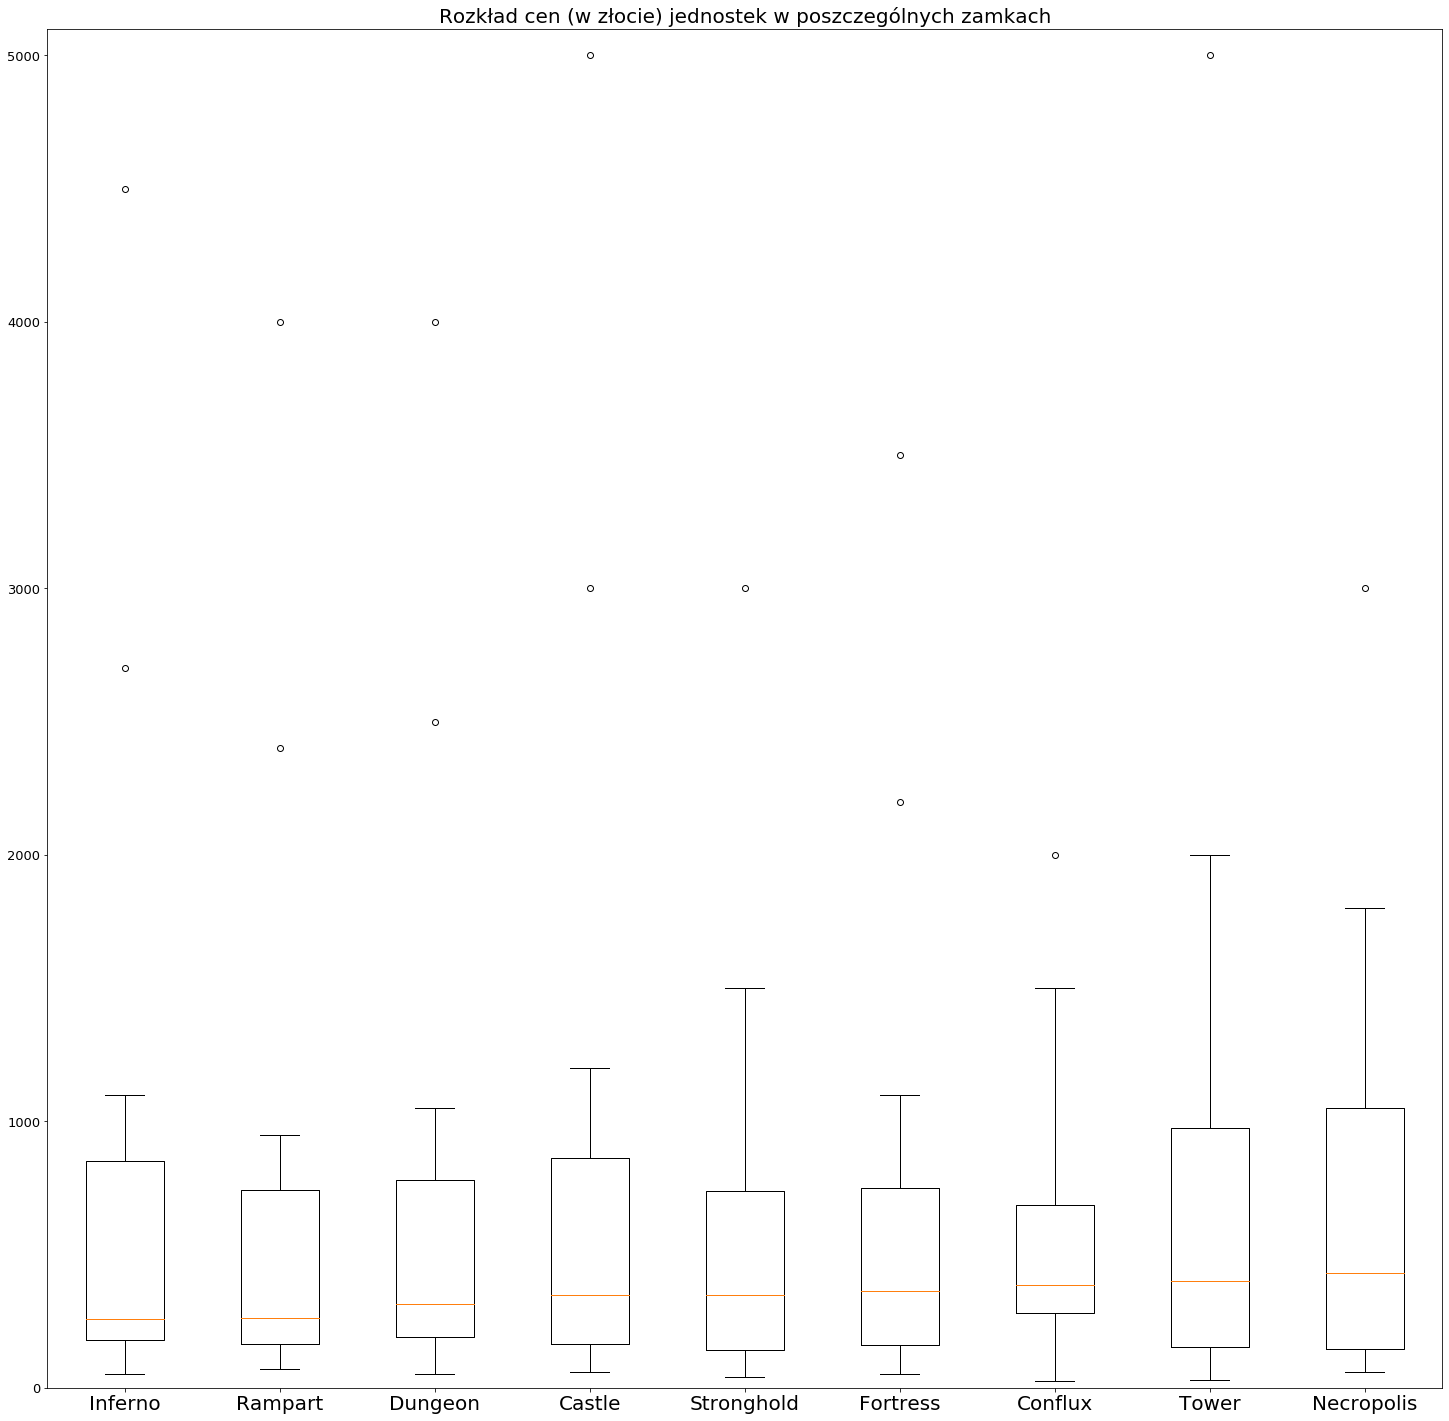

In [10]:
#Dystrybucja #1 - boxplot - rozkład cen (w złocie) jednostek w poszczególnych zamkach - po 1 każdego rodzaju (po 14 obserwacji w 1 kolumnie)
#Boxplot: linia środkowa - mediana, box to odstęp pomiędzy I i III kwartylem, warkocz to min(max_obs, Q3+IQR*2) i max(min_obs, Q1-IQR*2) gdzie IQR - rozstęp międzykwartylowy
df2=df.loc[:,['Castle', 'Gold']]
df3=df2.groupby(['Castle'], as_index=False).median().sort_values(by='Gold')
k=df3['Castle']
k=k[k!='Neutral']

"""
k=np.unique(df['Castle'])
k=k[k!='Neutral']"""
l1=[0]*len(k)
for i in range(len(k)):
    l1[i]=df2[df2['Castle']==k[k.index[i]]].loc[:,'Gold']

fig, ax=plt.subplots(1,1)
fig.set_size_inches(25,25)
ax.boxplot(l1, labels=k, whis=2)
ax.set_ylim(0, 5100)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_title('Rozkład cen (w złocie) jednostek w poszczególnych zamkach', fontsize=20)
plt.show()

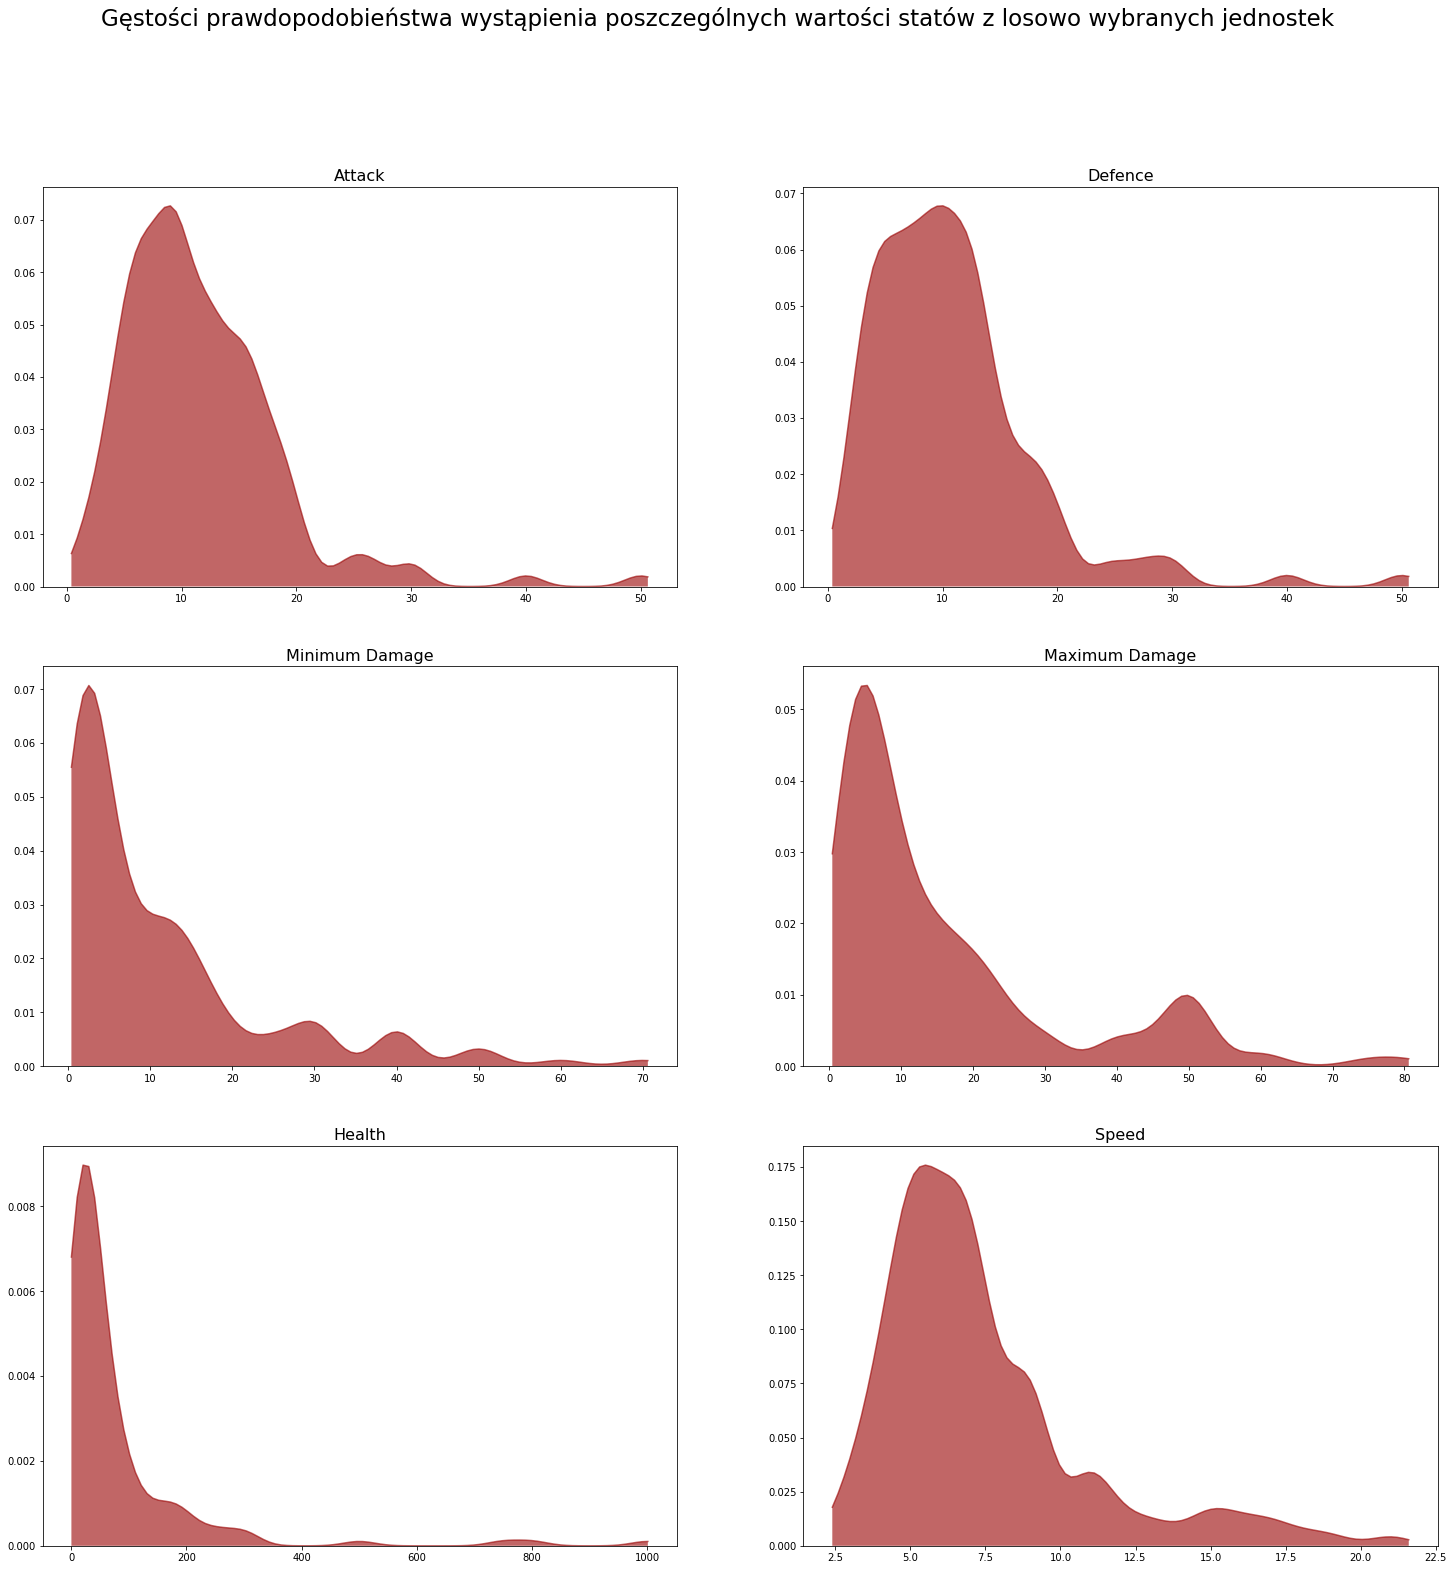

In [11]:
#Dystrybucja #3 - density plot w 1 wymiarze - lepsza wersja histogramu
#Gęstości prawdopodobieństwa wystąpienia poszczególnych wartości statów z losowo wybranych jednostek - czyli de facto wygłądzony histogram wyliczony z kernel density estimation
#Rozmiar 'binów' można modelować za pomocą parametru bw
fig, ax=plt.subplots(3, 2)
fig.set_size_inches(25,25)

for j in range(0, 6, 1):
    fax=ax[j//2][j%2]
    sns.kdeplot(data=df.loc[:,df.columns[3+j]], ax=fax, shade=True, bw=0.2, alpha=0.6, color='#990000')
    fax.set_title(df.columns[3+j], fontsize=16)
    fax.get_legend().remove()
fig.suptitle('Gęstości prawdopodobieństwa wystąpienia poszczególnych wartości statów z losowo wybranych jednostek', fontsize=23)
plt.show()

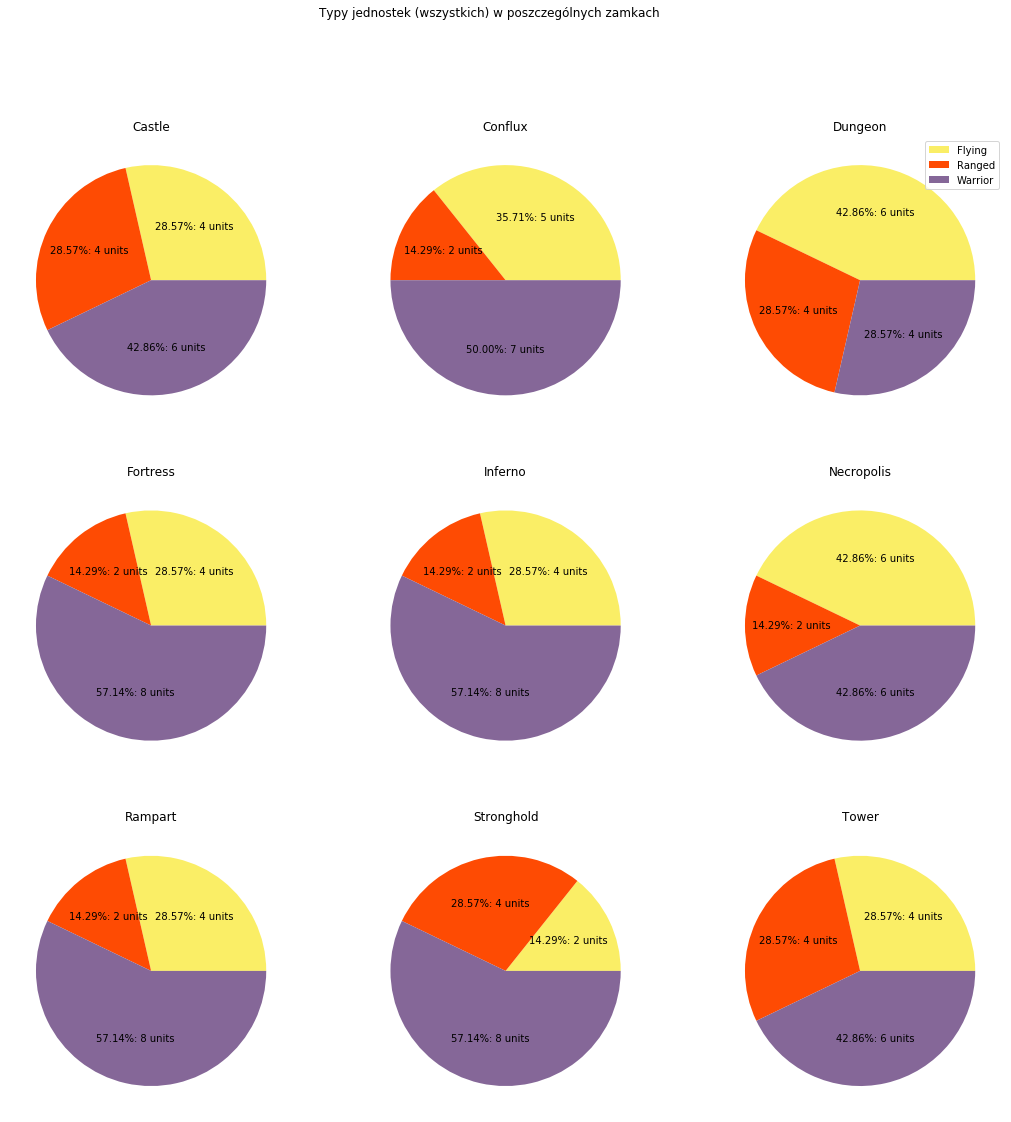

In [42]:
#Część całości #2 - pie chart - najgorszy możliwy wykres, nie dość, że kołowy i wymusza porównywanie powierzchni (do czego ludzkie oko się nie nadaje), to jeszcze brzydki
#W tym wykresie porównuję różne typy jednostek w poszczególnych zamkach. Wykres jest koszmarny, ale to immanentna cecha piecharta. Stacked barplot byłby zdecydowanie lepszy, ale chciałem zaprezentować piecharta

df2=df.copy()
df2['All']=1

df3=df2.groupby(['Castle', 'Type'], as_index=False).count()

fig, ax=plt.subplots(3,3, figsize=(18,18))
castles=np.unique(df2['Castle'])
castles=castles[castles!='Neutral']


for i in range(0, 3, 1):
    for j in range(0, 3, 1):
        adf=df3[df3['Castle']==castles[i*3+j]]
        fa=ax[i][j]
        fa.set_title(castles[i*3+j])
        fa.pie(x=adf['All'], labels=adf['Type'], labeldistance=None, colors=['#FAEE66', '#FE4B03', '#856798'], autopct=lambda perc: ('%.2f%s: %d units' %(perc, '%', round(perc*sum(adf['All'])/100,0))))
        fa.axis('off')
    
ax[0][2].legend()
fig.suptitle('Typy jednostek (wszystkich) w poszczególnych zamkach')
plt.show()

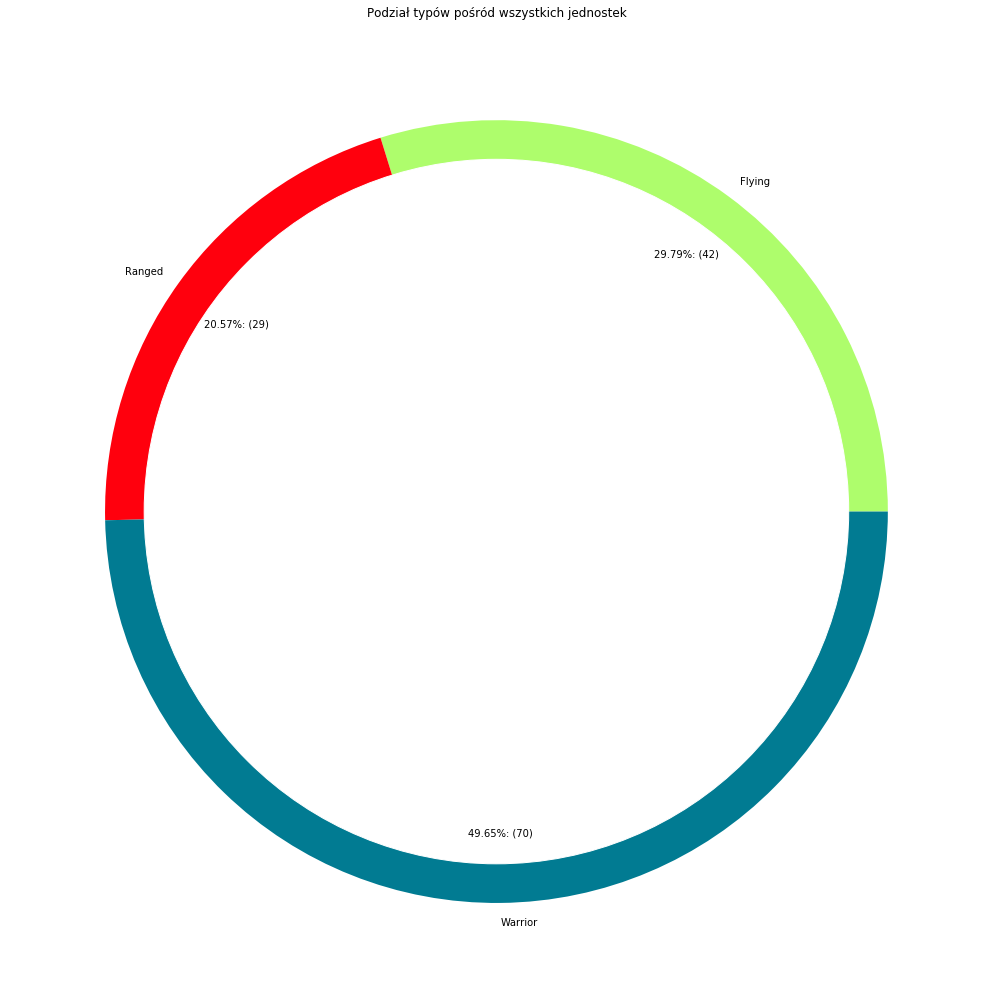

In [40]:
#Część całości #3 - donut plot - lepszy niż pie chart, bo porównuję długości
#Wykres analogiczny jak poprzedni, ale bez podziału na zamki
#Identyczna obróbka dataseta jak w pie charcie
df2=df.copy()
df2['All']=1
df3=df2.groupby(['Type'], as_index=False).count()

fig, ax=plt.subplots(1,1,figsize=(18,18))
ax.pie(x=df3['All'], labels=df3['Type'], labeldistance=1.05, colors=['#AEFD6C', '#FF000D', '#017B92'], autopct=lambda perc: ('%.2f%s: (%d)' %(perc, '%', round(perc*sum(df3['All'])/100,0))), pctdistance=0.82)
f=plt.Circle((0,0), 0.9, color='#FFFFFF')
ax.add_artist(f)
ax.set_title('Podział typów pośród wszystkich jednostek')

plt.show()

C:\Users\Dom\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


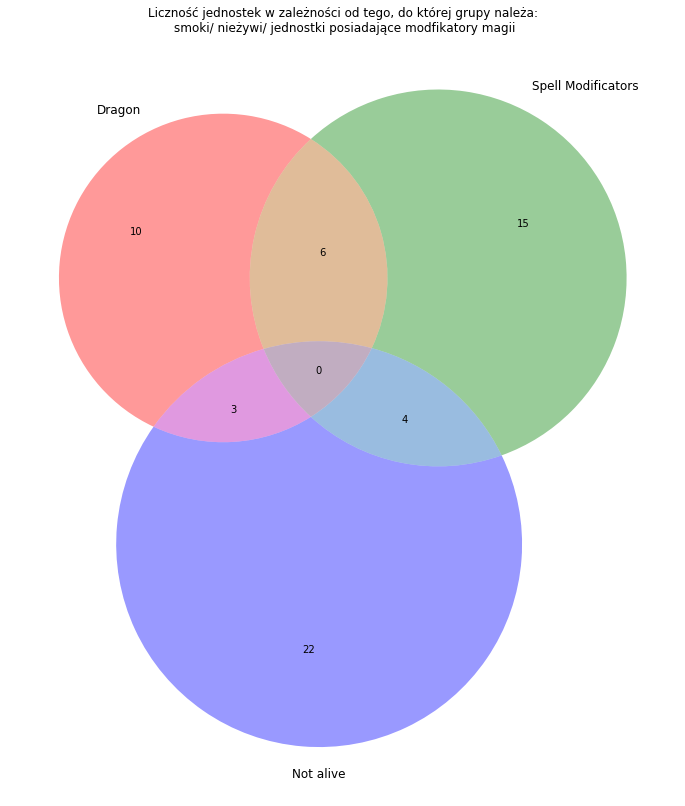

In [14]:
#Część całości #6 - Diagram Venna - przydatny do pokazywania logicznego iloczynu między kilkoma zbiorami
#Wykres przedstawia liczności 3 parametrów jednostki i ich koniunkcji

df2=df.copy()
a=[0]*3
gr=3

a[0]=df2['Unit_name'].str.contains('Dragon$')
a[1]=df2['Special_abilities'].str.contains('[sS]pell')
a[2]=df2['Special_abilities'].str.contains('Un(living|dead)', regex=True)

z=pow(2,gr)
aef=[0]*z

for i in range(z):
    f=[True]*df2.shape[0]
    j=i
    ij=0
    
    while (j>0):
        if (j%2==1):
            f=f&a[ij]
        ij+=1
        j=j//2
        
    aef[i]=sum(f)
fig, ax=plt.subplots(1,1, figsize=(14,14))
venn3(aef[1:z], set_labels=['Dragon','Spell Modificators', 'Not alive'], ax=ax)
ax.set_title('Liczność jednostek w zależności od tego, do której grupy należa:\n smoki/ nieżywi/ jednostki posiadające modfikatory magii')
plt.show()

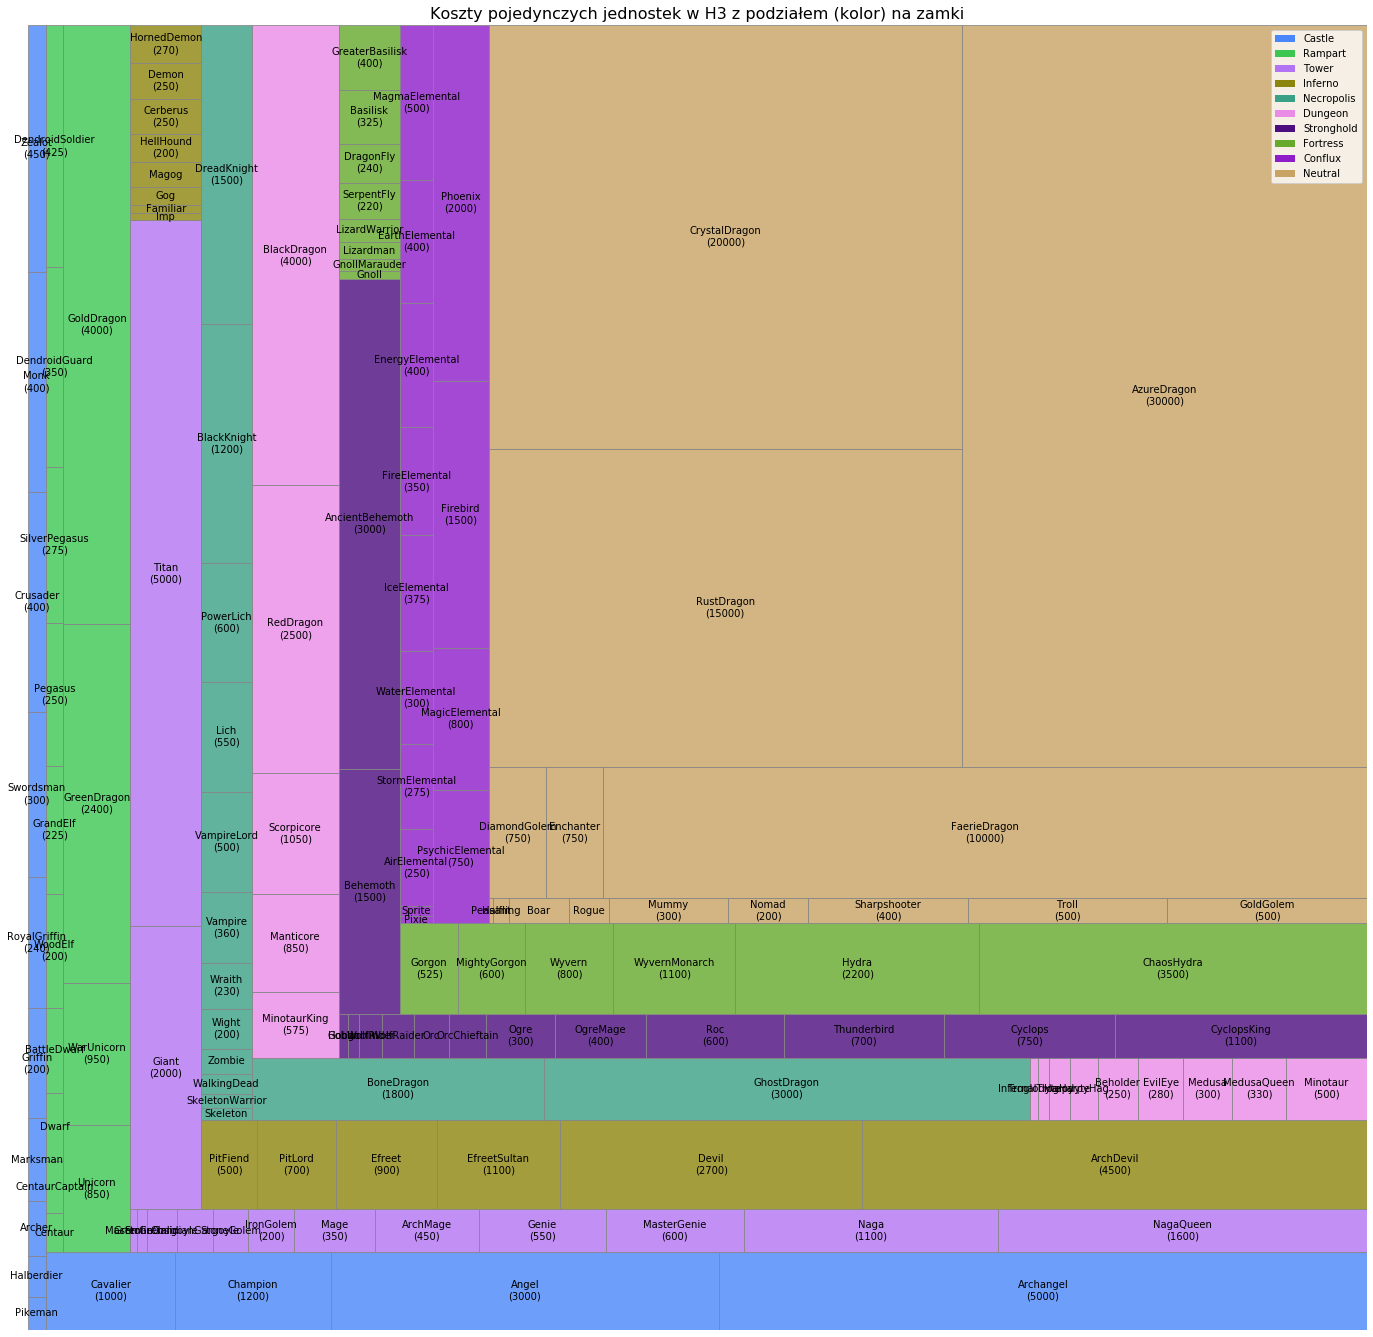

In [30]:
#Część całości #4 - Treeplot - pozwala on (podobnie jak subburst czy dendrogram) analizować w całości zbiory hierarchiczne - z podziałem na podzbiory
#Ten wykres nie jest idealny - byłby taki, gdybym sam sobie implementował funkcję tworzącą treemapę, ale mi się tego nie chce -
#Kolejne obserwacje powinny być obok siebie, układać się w 'węża' - gdybym ja to implementował
#Mogłem stworzyć ładniejszy wykres z mniejszą ilością obserwacji, ale wolałem sprawdzić, jak się customizuje treeplota i pcha kolory do wykresu
#Wykres pokazuje porównanie kosztu w złocie dla wszystkich jednostek z podziałem na zamki; pomijam koszty tanich jednostek, dzięki temu wykres jest względnie czytelny
#Najciekawszą rzeczą z tego wykresu jest rozrzut między cenami 3 smoków a pozostałych 139 jednostek

#string to int z 2 slotami
def hextodec(a):
    x=0; clr=0; av=1
    L=len(a)
    
    for i in range(L):
        clr=ord(a[L-i-1])
        if (clr>=65):
            clr-=55
        else:
            clr-=48
        x=x+av*clr
        av*=16
    return x

#integer to string z 2 slotami
def dectohex(a):
    l=[0]*2
    
    for i in range(2):
        x=a%16
        if (x<10):
            l[1-i]=chr(x+48)
        else:
            l[1-i]=chr(x+55)
        a=a//16
    return ''.join(l)

#interpolacja kolorów
def colorize(a, b, n):
    l=[0]*n
    d=[0]*3
    a1=[0]*3
    
    for i in range(0,3,1):
        f1=a[1+i*2:3+i*2]
        f2=b[1+i*2:3+i*2]
        a1[i]=f1=hextodec(f1)
        f2=hextodec(f2)
        d[i]=(f2-f1)//n
    
    for i in range(0, n, 1):
        l[i]='#'
        for j in range(0, 3, 1):
            l[i]+=dectohex(a1[j])
            a1[j]+=d[j]
    return l

#Stworzenie 2 randomowych kolorów o różnicy w 1 wymaiarze rzędu diff - przydatne do interpolowania kolorów
def gen_rand_colors(diff):
    if (diff>128):
        diff=128
    
    l=[0]*3
    l2=[0]*3
    
    for i in range(0,3,1):
        l[i]=l2[i]=np.random.randint(0,256)
    x=np.random.randint(0,3)
    if (l[x]<=255-diff):
        l2[x]=l[x]+diff
    else:
        l2[x]=l[x]-diff
    
    s1='#'; s2='#'
    for i in range(0,3,1):
        s1+=dectohex(l[i])
        s2+=dectohex(l2[i])
    return (s1, s2)



df2=df.copy()
df2['All']=1
df2['Kappa']=df2.index

df2=df2.groupby(['Castle'], as_index=False).sum().sort_values(by='Kappa')
#print(df2)


fig, ax=plt.subplots(1,1)
fig.set_size_inches(24,24)

clr=[]
lg=[]
Z=df2.columns.get_loc('All')
W=df2.columns.get_loc('Castle')
for i in range(0, df2.shape[0], 1):
    s1, s2=gen_rand_colors(90)
    #clr.extend(colorize(s1, s2, df2.iat[i,Z])) #interpolacja po kolorach - nie polecam, rozmywa się efekt porównania zamków
    clr.extend(colorize(s1, s1, df2.iat[i,Z]))
    lg.append(Patch(facecolor=s1, label=df2.iat[i,W]))
#print(len(clr))

lb=df['Unit_name']+'\n('+df['Gold'].astype(str)+')'
for i in range(0, len(lb), 1):
    if (df.at[i,'Gold']<200):
        lb[i]=df.at[i,'Unit_name']
        
squarify.plot(sizes=df['Gold'], label=lb, alpha=0.8, ax=ax, color=clr, text_kwargs={'fontsize': 10}, bar_kwargs={'fill': True, 'edgecolor': '#888888'})
ax.set_title('Koszty pojedynczych jednostek w H3 z podziałem (kolor) na zamki', fontsize=16)
ax.axis('off')
ax.legend(handles=lg)

plt.show()

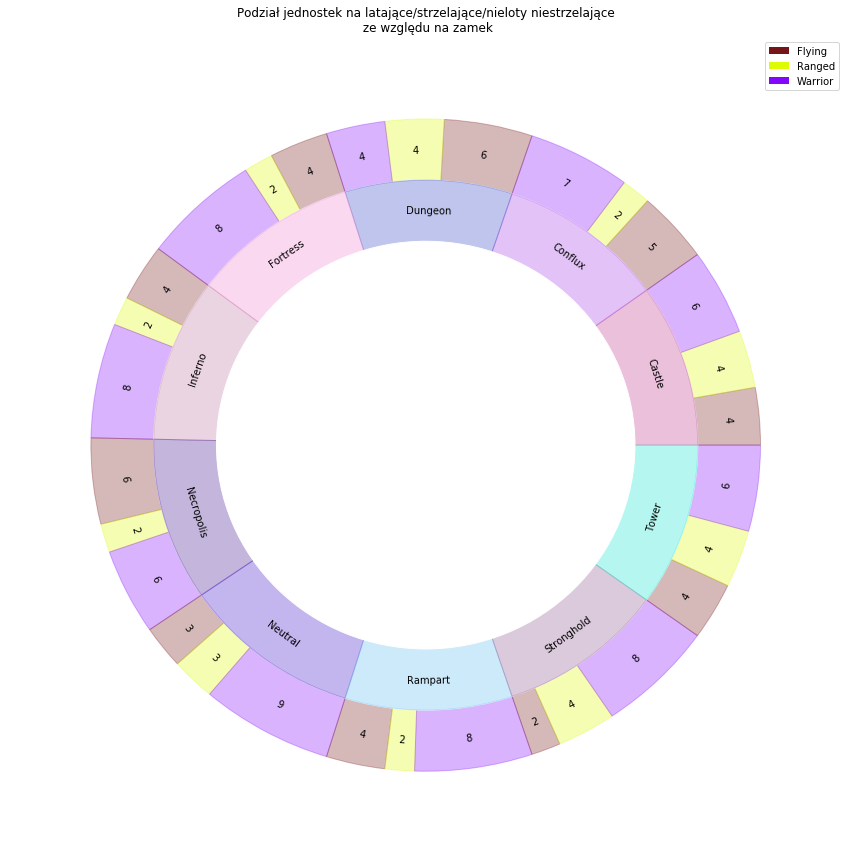

In [132]:
#Część całości #7 - sunburst - pozwala robić rzeczy, które są niemożliwe w zwykłym piecharcie/donucie - zhierarchizowanie obserwacji
#Preferowany na ogół jest dendrogram - kartezjański, nie polarny, ale brzydszy, mi się wydaje mniej informatywny
#Wykres przedstawia podział jednostek ze względu na zamek
#Jak ktoś chce mindfucka, może dodać do cols nowe kolumny, ewentualnie pozmieniać xlim i ylim

#ax - oś, df - dataframe, cols - kolumny od najbardziej wewnętrznej do najbardziej zewnętrznej, leg - legenda
def sunnburst(ax, df, cols, leg=[]):
    df['All']=1
    t1=0
    Cl=len(cols)
    summ=df.shape[0]
    
    colz=['Column', 'Value', 'Color', 'Used']    
    allez=[] 
    for j in range(Cl):
        tp=np.unique(df[cols[j]])
        for i in range(0, len(tp),1):
            c1, c1=gen_rand_colors(0)
            allez.append([cols[j], tp[i], c1, 0])
    dfendet=pd.DataFrame.from_records(allez, columns=colz)
    
    for j in range(0, Cl, 1):
        df3=df.groupby(cols[0:Cl-j], as_index=False).sum()
        Z=df3.columns.get_loc('All')
        W=df3.columns.get_loc(cols[Cl-j-1])
        t1=0
        
        for i in range(0, df3.shape[0], 1):
            secsum=df3.iat[i,Z]
            view=dfendet[(dfendet['Column']==cols[Cl-j-1])&(dfendet['Value']==df3.iat[i,W])]
            colval=view.iat[0,2]
            
            f=patch.Wedge(center=(0,0), r=1+(Cl-j)*0.3, theta1=t1, theta2=t1+(secsum/summ)*360, color=colval, alpha=0.3)
            dg=(2*t1+(secsum/summ)*360)/2
            rad=1+(Cl-j)*0.3-0.15
            
            t1=t1+(secsum/summ)*360
            ax.add_artist(f)
            
            sdg=90+dg
            if (sdg>90 and sdg<270):
                sdg-=180
            
            if (j==Cl-1):
                ax.text(x=rad*math.cos(dg*math.pi/180), y=rad*math.sin(dg*math.pi/180), s=df3.iat[i,W], rotation=sdg, verticalalignment='center', horizontalalignment='center')
            
            else:
                if (view.iat[0,3]==0):
                    leg.append(Patch(facecolor=colval, label=view.iat[0,1]))
                    dfendet.loc[(dfendet['Column']==cols[Cl-j-1])&(dfendet['Value']==df3.iat[i,W]),'Used']=1
                ax.text(x=rad*math.cos(dg*math.pi/180), y=rad*math.sin(dg*math.pi/180), s=df3.iat[i,Z], rotation=sdg, verticalalignment='center', horizontalalignment='center') 
                
            
            
        f=patch.Wedge(center=(0,0), r=1+(Cl-j-1)*0.3, theta1=0, theta2=360, color='white', alpha=1)
        ax.add_artist(f)
    ax.axis('off')
    return

df2=df.copy()
fig, ax=plt.subplots(1,1,figsize=(15,15))
lg=[]
sunnburst(ax=ax, df=df2, cols=['Castle', 'Type'], leg=lg)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title('Podział jednostek na latające/strzelające/nieloty niestrzelające\n ze względu na zamek')
ax.legend(handles=lg)
plt.show()